# Keras YOLO v8

### Keras YOLOv8

https://www.kaggle.com/models/keras/yolov8

https://www.kaggle.com/models/keras/yolov8/keras/yolo_v8_l_backbone

https://keras.io/examples/vision/yolov8/

## Tutorial from


Fine tunning with Keras [Object Detection with KerasCV](https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/keras_cv/object_detection_keras_cv.ipynb#scrollTo=61sCS830dIz_)

Another similar tutorial
[Efficient Object Detection with YOLOV8 and KerasCV](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/yolov8.ipynb)

https://colab.research.google.com/drive/1wLfukN6AKkBCS8X5iTnYjURlYblUmxPF

### Other References

https://www.youtube.com/watch?v=vCT5rFrERaI

https://github.com/spmallick/learnopencv/tree/master/Object-Detection-using-KerasCV-YOLOv8

https://github.com/spmallick/learnopencv/tree/master





## Packages installation

TensorFlow compatibility
The following Keras + TensorFlow versions are compatible with each other:

To use Keras 2:

```
tensorflow~=2.13.0 & keras~=2.13.0
tensorflow~=2.14.0 & keras~=2.14.0
tensorflow~=2.15.0 & keras~=2.15.0
```

To use Keras 3:

```
tensorflow~=2.16.1 & keras~=3.0
```

In [ ]:
!pip install -q keras_core
!pip install -q keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# !pip install --upgrade keras-cv
# !pip install keras==3.2.0
# !pip install tensorflow==2.16.1

In [ ]:
# !pip freeze


## Packages Import

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  # Or "jax" or "torch"!

import tensorflow as tf
import keras_cv
import tensorflow_datasets as tfds
import keras

Using TensorFlow backend


## Dev env packages import

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import zipfile


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 21 14:30:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Kaggle example of model use

In [ ]:
# input_data = tf.ones(shape=(8, 224, 224, 3))

# # Pretrained backbone
# model = keras_cv.models.YOLOV8Backbone.from_preset(
#     "yolo_v8_l_backbone"
# )
# output = model(input_data)

# # Randomly initialized backbone with a custom config
# model = keras_cv.models.YOLOV8Backbone(
#     stackwise_channels=[128, 256, 512, 1024],
#     stackwise_depth=[3, 9, 9, 3],
#     include_rescaling=False,
# )
# output = model(input_data)


100%|██████████| 633/633 [00:00<00:00, 444kB/s]


## Perform detections with a pretrained model

In [ ]:
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc", bounding_box_format="xywh"
)

100%|██████████| 2.27k/2.27k [00:00<00:00, 5.18MB/s]
100%|██████████| 99.5M/99.5M [00:02<00:00, 39.3MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


### Loading the image

In [ ]:
# filepath = keras.utils.get_file(origin="/content/2f1381e8-39339a1089.jpg")
filepath = '/content/validation_motorcycle.jpeg'
image = keras.utils.load_img(filepath)
image = np.array(image)

visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

### Detecting an object

#### Setting the image in the sizes of the pipeline

In [ ]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [ ]:
image_batch = inference_resizing([image])

#### Setting the YOLOv8 classes

In [ ]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

In [ ]:
y_pred = pretrained_model.predict(image_batch)

1/1 [==============================] - 16s 16s/step


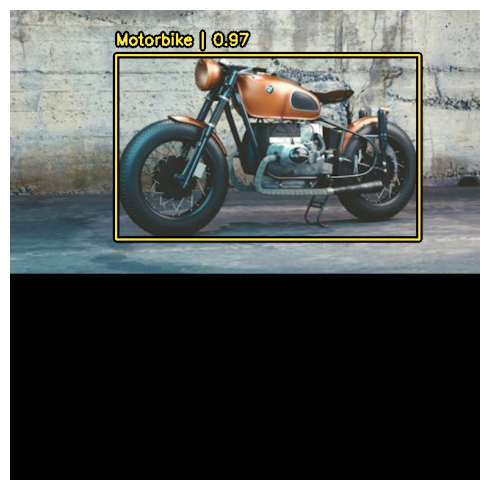

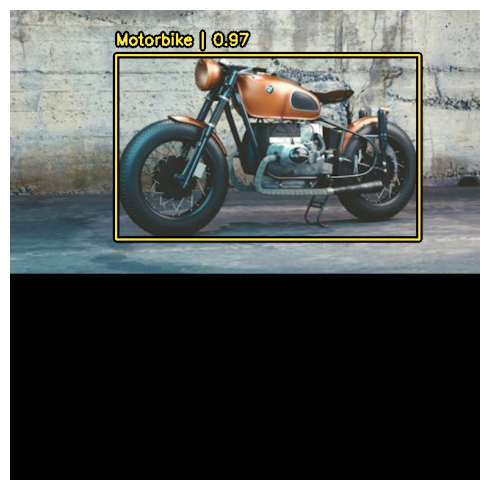

In [ ]:
# y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

### Non-max suppression detection OFF

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


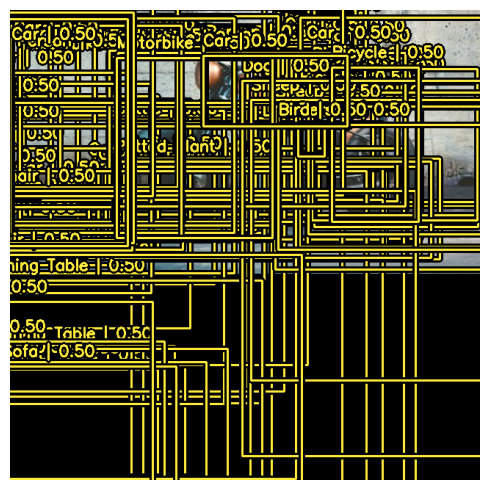

In [ ]:
# The following NonMaxSuppression layer is equivalent to disabling the operation
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=1.0,
    confidence_threshold=0.0,
)
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh",
    prediction_decoder=prediction_decoder,
)

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)


### Non-max suppression detection ON

Next, let's re-configure `keras_cv.layers.NonMaxSuppression` for our
use case!
In this case, we will tune the `iou_threshold` to `0.2`, and the
`confidence_threshold` to `0.7`.

In [ ]:
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # Tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh",
    prediction_decoder=prediction_decoder,
)

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [ ]:
#Using the car image to see what happens
filepath = '/content/training_car.jpg'
image = keras.utils.load_img(filepath)
image = np.array(image)

inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)
image_batch = inference_resizing([image])

In [ ]:
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # Tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh",
    prediction_decoder=prediction_decoder,
)

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


# YOLOV8 and KerasCV Finetunning

In [ ]:
import os
from tqdm.auto import tqdm
import xml.etree.ElementTree as ET

import tensorflow as tf
from tensorflow import keras

import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization

## Hyperparameters

In [ ]:
SPLIT_RATIO = 0.2
BATCH_SIZE = 4
LEARNING_RATE = 0.001
EPOCH = 5
GLOBAL_CLIPNORM = 10.0

### Load dataset

In [ ]:
# Unpacking dataset
local_zip = "/content/pascal_voc_xml.zip"

zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [ ]:
class_ids = [
    "carros",
    "motos",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

# Path to images and annotations
path_images = "/content/dataset/images"
path_annot = "/content/dataset/Annotations"

# Get all XML file paths in path_annot and sort them
xml_files = sorted(
    [
        os.path.join(path_annot, file_name)
        for file_name in os.listdir(path_annot)
        if file_name.endswith(".xml")
    ]
)

# Get all JPEG image file paths in path_images and sort them
jpg_files = sorted(
    [
        os.path.join(path_images, file_name)
        for file_name in os.listdir(path_images)
        if file_name.endswith(".jpg")
    ]
)

The function below reads the XML file and finds the image name and path, and then iterates over each object in the XML file to extract the bounding box coordinates and class labels for each object

In [ ]:

def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_name = root.find("filename").text
    image_path = os.path.join(path_images, image_name)

    boxes = []
    classes = []
    for obj in root.iter("object"):
        cls = obj.find("name").text
        classes.append(cls)

        bbox = obj.find("bndbox")
        xmin = float(bbox.find("xmin").text)
        ymin = float(bbox.find("ymin").text)
        xmax = float(bbox.find("xmax").text)
        ymax = float(bbox.find("ymax").text)
        boxes.append([xmin, ymin, xmax, ymax])

    class_ids = [
        list(class_mapping.keys())[list(class_mapping.values()).index(cls)]
        for cls in classes
    ]
    return image_path, boxes, class_ids


image_paths = []
bbox = []
classes = []
for xml_file in tqdm(xml_files):
    image_path, boxes, class_ids = parse_annotation(xml_file)
    image_paths.append(image_path)
    bbox.append(boxes)
    classes.append(class_ids)

  0%|          | 0/57 [00:00<?, ?it/s]

Here we are using `tf.ragged.constant` to create ragged tensors from the `bbox` and
`classes` lists. A ragged tensor is a type of tensor that can handle varying lengths of
data along one or more dimensions. This is useful when dealing with data that has
variable-length sequences,

In [ ]:
bbox = tf.ragged.constant(bbox)
classes = tf.ragged.constant(classes)
image_paths = tf.ragged.constant(image_paths)

data = tf.data.Dataset.from_tensor_slices((image_paths, classes, bbox))

Splitting data in training and validation data

In [ ]:
# Determine the number of validation samples
num_val = int(len(xml_files) * SPLIT_RATIO)

# Split the dataset into train and validation sets
val_data = data.take(num_val)
train_data = data.skip(num_val)

In [ ]:

def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image


def load_dataset(image_path, classes, bbox):
    # Read Image
    image = load_image(image_path)
    bounding_boxes = {
        "classes": tf.cast(classes, dtype=tf.float32),
        "boxes": bbox,
    }
    return {"images": tf.cast(image, tf.float32), "bounding_boxes": bounding_boxes}


### Data Augmentation

https://keras.io/api/keras_cv/layers/

https://keras.io/api/layers/preprocessing_layers/image_augmentation/

keras_cv.src.layers.preprocessing.random_crop.RandomCrop

In [ ]:
augmenter = keras.Sequential(
    layers=[
        keras_cv.layers.RandomFlip(
            mode="horizontal",
            bounding_box_format="xyxy",
        ),
        keras_cv.layers.RandomShear(
            x_factor=0.2,
            y_factor=0.2,
            bounding_box_format="xyxy"
        ),
        keras_cv.layers.RandomBrightness(
            factor=0.2,
        ),
        keras_cv.layers.RandomCrop(
            640,
            640,
            bounding_box_format="xyxy"
        ),
        keras_cv.layers.JitteredResize(
            target_size=(640, 640),
            scale_factor=(0.75, 1.3),
            bounding_box_format="xyxy"
        ),
    ]
)

## Creating Training Dataset

In [ ]:
# El data augmentation se hace despues de separar los datos porque esta es la forma correcta
train_ds = train_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(BATCH_SIZE * 4)
train_ds = train_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
train_ds = train_ds.map(augmenter, num_parallel_calls=tf.data.AUTOTUNE)

## Creating Validation Dataset

In [ ]:
resizing = keras_cv.layers.JitteredResize(
    target_size=(640, 640),
    scale_factor=(0.75, 1.3),
    bounding_box_format="xyxy",
)

val_ds = val_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(BATCH_SIZE * 4)
val_ds = val_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
val_ds = val_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)

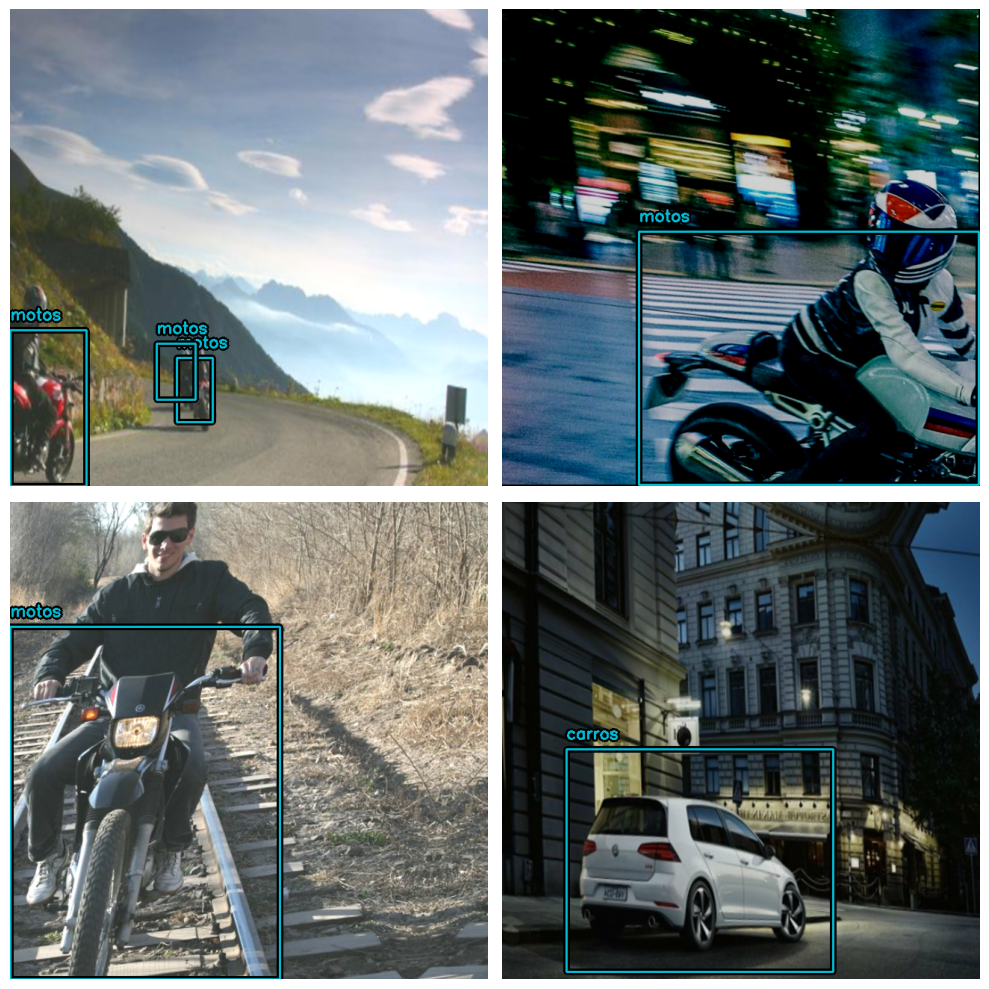

In [ ]:

def visualize_dataset(inputs, value_range, rows, cols, bounding_box_format):
    inputs = next(iter(inputs.take(1)))
    images, bounding_boxes = inputs["images"], inputs["bounding_boxes"]
    visualization.plot_bounding_box_gallery(
        images,
        value_range=value_range,
        rows=rows,
        cols=cols,
        y_true=bounding_boxes,
        scale=5,
        font_scale=0.7,
        bounding_box_format=bounding_box_format,
        class_mapping=class_mapping,
    )


visualize_dataset(
    train_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=2, cols=2
)



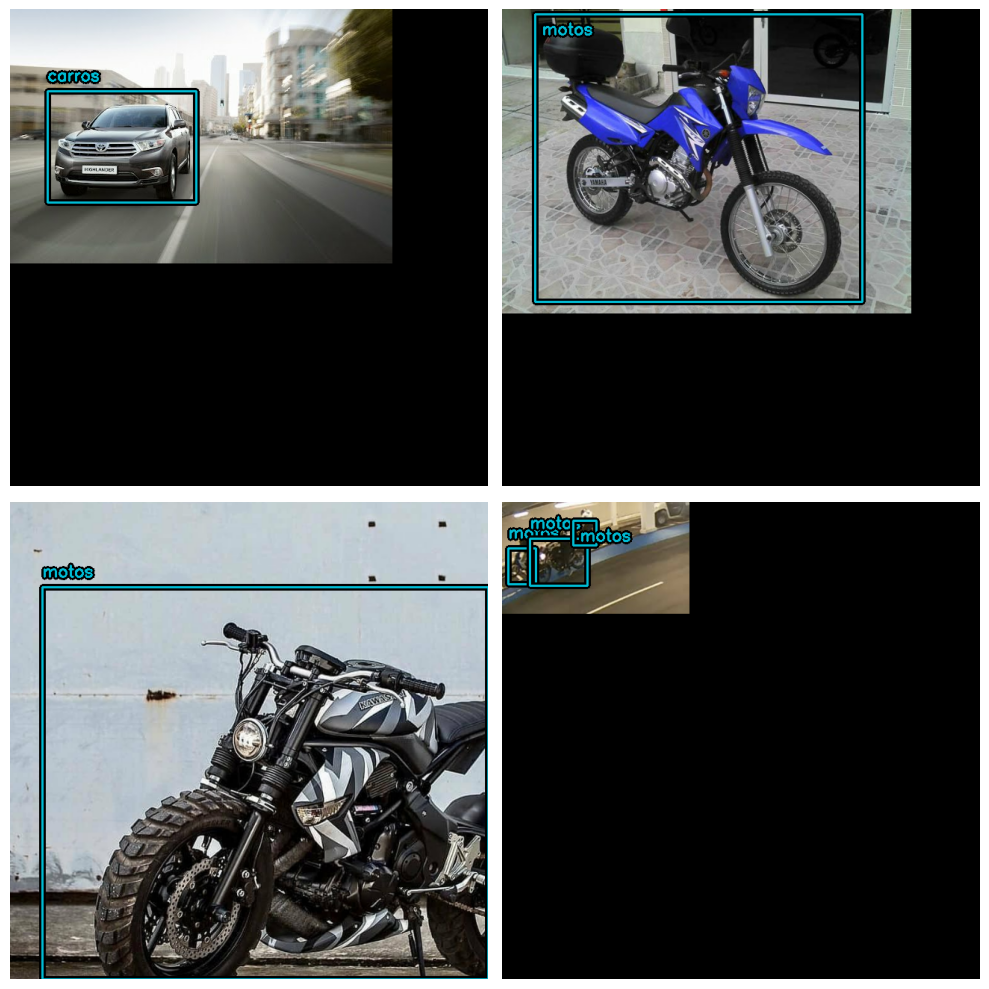

In [ ]:
visualize_dataset(
    val_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=2, cols=2
)

We need to extract the inputs from the preprocessing dictionary and get them ready to be
fed into the model.

In [ ]:

def dict_to_tuple(inputs):
    return inputs["images"], inputs["bounding_boxes"]


train_ds = train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

## Creating Model

First we will create a instance of backbone which will be used by our yolov8 detector
class.

YOLOV8 Backbones available in KerasCV:

1.   Without Weights:

    1.   yolo_v8_xs_backbone
    2.   yolo_v8_s_backbone
    3.   yolo_v8_m_backbone
    4.   yolo_v8_l_backbone
    5.   yolo_v8_xl_backbone

2. With Pre-trained coco weight:

    1.   yolo_v8_xs_backbone_coco
    2.   yolo_v8_s_backbone_coco
    2.   yolo_v8_m_backbone_coco
    2.   yolo_v8_l_backbone_coco
    2.   yolo_v8_xl_backbone_coco



In [ ]:
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xyxy",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # Tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_s_backbone_coco",  # We will use yolov8 small backbone with coco weights
    bounding_box_format="xyxy",
    prediction_decoder=prediction_decoder,
)

100%|██████████| 646/646 [00:00<00:00, 240kB/s]
100%|██████████| 19.7M/19.7M [00:01<00:00, 20.4MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [ ]:
yolo = keras_cv.models.YOLOV8Detector(
    num_classes=len(class_mapping),
    bounding_box_format="xyxy",
    backbone=backbone,
    fpn_depth=1,
)

## Compile the Model

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=LEARNING_RATE,
    global_clipnorm=GLOBAL_CLIPNORM,
)

yolo.compile(
    optimizer=optimizer, classification_loss="binary_crossentropy", box_loss="ciou"
)

## COCO Metric Callback

In [ ]:

class EvaluateCOCOMetricsCallback(keras.callbacks.Callback):
    def __init__(self, data, save_path):
        super().__init__()
        self.data = data
        self.metrics = keras_cv.metrics.BoxCOCOMetrics(
            bounding_box_format="xyxy",
            evaluate_freq=1e9,
        )

        self.save_path = save_path
        self.best_map = -1.0

    def on_epoch_end(self, epoch, logs):
        self.metrics.reset_state()
        for batch in self.data:
            images, y_true = batch[0], batch[1]
            y_pred = self.model.predict(images, verbose=0)
            self.metrics.update_state(y_true, y_pred)

        metrics = self.metrics.result(force=True)
        logs.update(metrics)

        current_map = metrics["MaP"]
        if current_map > self.best_map:
            self.best_map = current_map
            self.model.save(self.save_path)  # Save the model when mAP improves

        return logs


## My callbacks

https://www.tensorflow.org/tensorboard/get_started

```
%tensorboard --logdir logs/fit
```

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(
    monitor="loss", # metrica a evaluar
    patience=8, # cantidad de epochs que si la metrica no mejora tras N epochs el entramiento se detiene
    mode="auto", # puede ser: min,max, auto
)

callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/models',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
)

# %tensorboard --logdir logs/fit
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
yolo.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        # EvaluateCOCOMetricsCallback(val_ds, "model.h5"),
        callback_early,
        callback_checkpoint,
        tensorboard_callback,
    ],
)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 65.0471 - box_loss: 2.8665 - class_loss: 62.1805

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 47s 5s/step - loss: 65.0471 - box_loss: 2.8665 - class_loss: 62.1805 - val_loss: 94.0659 - val_box_loss: 4.3769 - val_class_loss: 89.6890
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 44.9085 - box_loss: 2.8842 - class_loss: 42.0243

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 49s 5s/step - loss: 44.9085 - box_loss: 2.8842 - class_loss: 42.0243 - val_loss: 86.1816 - val_box_loss: 4.3235 - val_class_loss: 81.8581
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 30.4254 - box_loss: 2.7396 - class_loss: 27.6858

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 52s 5s/step - loss: 30.4254 - box_loss: 2.7396 - class_loss: 27.6858 - val_loss: 51.8653 - val_box_loss: 3.1283 - val_class_loss: 48.7370
Epoch 4/50
11/11 [==============================] - 12s 1s/step - loss: 20.8939 - box_loss: 2.7088 - class_loss: 18.1851 - val_loss: 809.5675 - val_box_loss: 3.4882 - val_class_loss: 806.0793
Epoch 5/50
11/11 [==============================] - ETA: 0s - loss: 14.8636 - box_loss: 2.7730 - class_loss: 12.0906

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 51s 5s/step - loss: 14.8636 - box_loss: 2.7730 - class_loss: 12.0906 - val_loss: 27.4514 - val_box_loss: 3.7026 - val_class_loss: 23.7487
Epoch 6/50
11/11 [==============================] - 11s 909ms/step - loss: 9.9841 - box_loss: 2.5868 - class_loss: 7.3973 - val_loss: 55.9787 - val_box_loss: 4.1684 - val_class_loss: 51.8103
Epoch 7/50
11/11 [==============================] - 12s 969ms/step - loss: 8.3239 - box_loss: 2.8823 - class_loss: 5.4416 - val_loss: 54.0217 - val_box_loss: 4.1298 - val_class_loss: 49.8919
Epoch 8/50
11/11 [==============================] - 16s 1s/step - loss: 6.7297 - box_loss: 2.8230 - class_loss: 3.9067 - val_loss: 242.0257 - val_box_loss: 3.6812 - val_class_loss: 238.3445
Epoch 9/50
11/11 [==============================] - ETA: 0s - loss: 6.1376 - box_loss: 2.7417 - class_loss: 3.3958

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 53s 5s/step - loss: 6.1376 - box_loss: 2.7417 - class_loss: 3.3958 - val_loss: 6.1281 - val_box_loss: 3.6597 - val_class_loss: 2.4685
Epoch 10/50
11/11 [==============================] - ETA: 0s - loss: 5.3618 - box_loss: 2.5782 - class_loss: 2.7836

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 51s 5s/step - loss: 5.3618 - box_loss: 2.5782 - class_loss: 2.7836 - val_loss: 5.9921 - val_box_loss: 3.5016 - val_class_loss: 2.4906
Epoch 11/50
11/11 [==============================] - ETA: 0s - loss: 5.4695 - box_loss: 2.6666 - class_loss: 2.8029

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 51s 5s/step - loss: 5.4695 - box_loss: 2.6666 - class_loss: 2.8029 - val_loss: 5.9347 - val_box_loss: 3.7245 - val_class_loss: 2.2102
Epoch 12/50
11/11 [==============================] - 12s 975ms/step - loss: 5.2932 - box_loss: 2.7774 - class_loss: 2.5157 - val_loss: 6.6161 - val_box_loss: 3.0181 - val_class_loss: 3.5980
Epoch 13/50
11/11 [==============================] - ETA: 0s - loss: 5.1959 - box_loss: 2.7693 - class_loss: 2.4267

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 48s 4s/step - loss: 5.1959 - box_loss: 2.7693 - class_loss: 2.4267 - val_loss: 5.7920 - val_box_loss: 3.4265 - val_class_loss: 2.3655
Epoch 14/50
11/11 [==============================] - 12s 845ms/step - loss: 5.2909 - box_loss: 2.8651 - class_loss: 2.4258 - val_loss: 5.9834 - val_box_loss: 3.4004 - val_class_loss: 2.5830
Epoch 15/50
11/11 [==============================] - 12s 1s/step - loss: 4.9849 - box_loss: 2.7769 - class_loss: 2.2080 - val_loss: 37.4000 - val_box_loss: 4.1789 - val_class_loss: 33.2211
Epoch 16/50
11/11 [==============================] - 12s 834ms/step - loss: 4.8692 - box_loss: 2.6855 - class_loss: 2.1837 - val_loss: 1715.6379 - val_box_loss: 4.4277 - val_class_loss: 1711.2102
Epoch 17/50
11/11 [==============================] - 12s 909ms/step - loss: 4.9909 - box_loss: 2.8899 - class_loss: 2.1010 - val_loss: 76.1154 - val_box_loss: 4.1172 - val_class_loss: 71.9983
Epoch 18/50
11/11 [==============================] - 12s 8

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 48s 5s/step - loss: 4.7515 - box_loss: 2.7196 - class_loss: 2.0319 - val_loss: 5.7292 - val_box_loss: 3.6218 - val_class_loss: 2.1073
Epoch 23/50
11/11 [==============================] - 12s 952ms/step - loss: 4.6332 - box_loss: 2.6627 - class_loss: 1.9705 - val_loss: 5.7675 - val_box_loss: 3.8582 - val_class_loss: 1.9093
Epoch 24/50
11/11 [==============================] - ETA: 0s - loss: 4.7738 - box_loss: 2.7930 - class_loss: 1.9808

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 52s 5s/step - loss: 4.7738 - box_loss: 2.7930 - class_loss: 1.9808 - val_loss: 5.7171 - val_box_loss: 3.5818 - val_class_loss: 2.1353
Epoch 25/50
11/11 [==============================] - ETA: 0s - loss: 4.8204 - box_loss: 2.8142 - class_loss: 2.0062

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 53s 5s/step - loss: 4.8204 - box_loss: 2.8142 - class_loss: 2.0062 - val_loss: 5.5232 - val_box_loss: 3.4635 - val_class_loss: 2.0597
Epoch 26/50
11/11 [==============================] - 12s 978ms/step - loss: 4.8782 - box_loss: 2.8791 - class_loss: 1.9991 - val_loss: 44.7906 - val_box_loss: 3.2753 - val_class_loss: 41.5153
Epoch 27/50
11/11 [==============================] - 12s 964ms/step - loss: 4.7346 - box_loss: 2.7622 - class_loss: 1.9724 - val_loss: 497.3413 - val_box_loss: 3.6659 - val_class_loss: 493.6754
Epoch 28/50
11/11 [==============================] - 12s 1s/step - loss: 4.8633 - box_loss: 2.9368 - class_loss: 1.9265 - val_loss: 6.3667 - val_box_loss: 4.1363 - val_class_loss: 2.2304
Epoch 29/50
11/11 [==============================] - 12s 931ms/step - loss: 4.2926 - box_loss: 2.3653 - class_loss: 1.9273 - val_loss: 6.0783 - val_box_loss: 3.7085 - val_class_loss: 2.3699
Epoch 30/50
11/11 [==============================] - 12s 1000m

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 52s 5s/step - loss: 4.7501 - box_loss: 2.7288 - class_loss: 2.0212 - val_loss: 4.9647 - val_box_loss: 2.8157 - val_class_loss: 2.1490
Epoch 36/50
11/11 [==============================] - ETA: 0s - loss: 4.4929 - box_loss: 2.5151 - class_loss: 1.9778

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:4

11/11 [==============================] - 47s 4s/step - loss: 4.4929 - box_loss: 2.5151 - class_loss: 1.9778 - val_loss: 4.9122 - val_box_loss: 2.9053 - val_class_loss: 2.0069
Epoch 37/50
11/11 [==============================] - 12s 958ms/step - loss: 4.5584 - box_loss: 2.5997 - class_loss: 1.9586 - val_loss: 6.4750 - val_box_loss: 3.7097 - val_class_loss: 2.7653


## Visualize Predictions

1/1 [==============================] - 0s 152ms/step


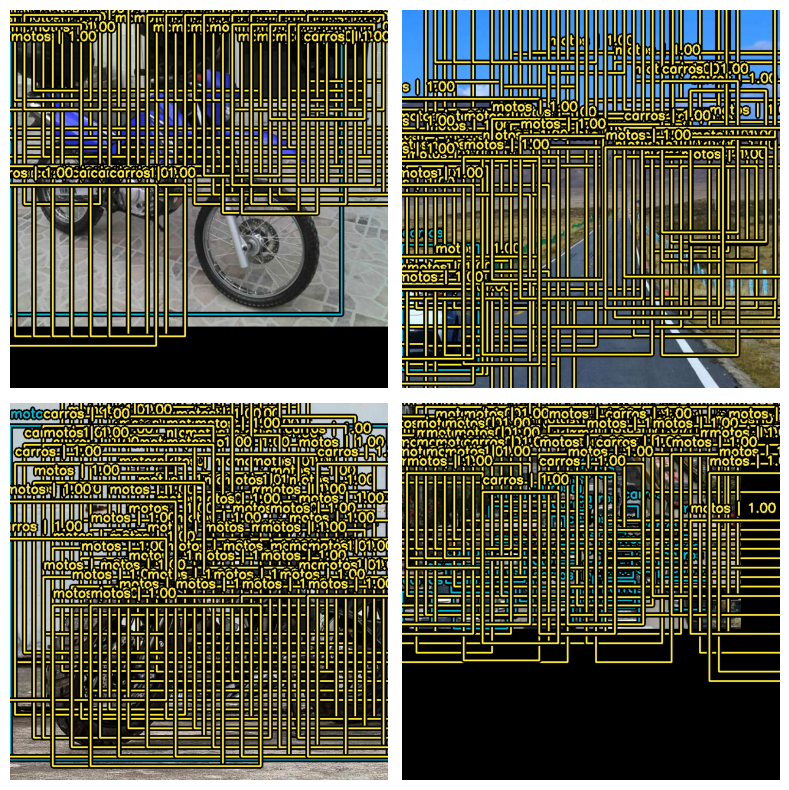

In [ ]:

def visualize_detections(model, dataset, bounding_box_format):
    images, y_true = next(iter(dataset.take(1)))
    y_pred = model.predict(images)
    y_pred = bounding_box.to_ragged(y_pred)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=y_true,
        y_pred=y_pred,
        scale=4,
        rows=2,
        cols=2,
        show=True,
        font_scale=0.7,
        class_mapping=class_mapping,
    )


visualize_detections(yolo, dataset=val_ds, bounding_box_format="xyxy")

1/1 [==============================] - 0s 266ms/step


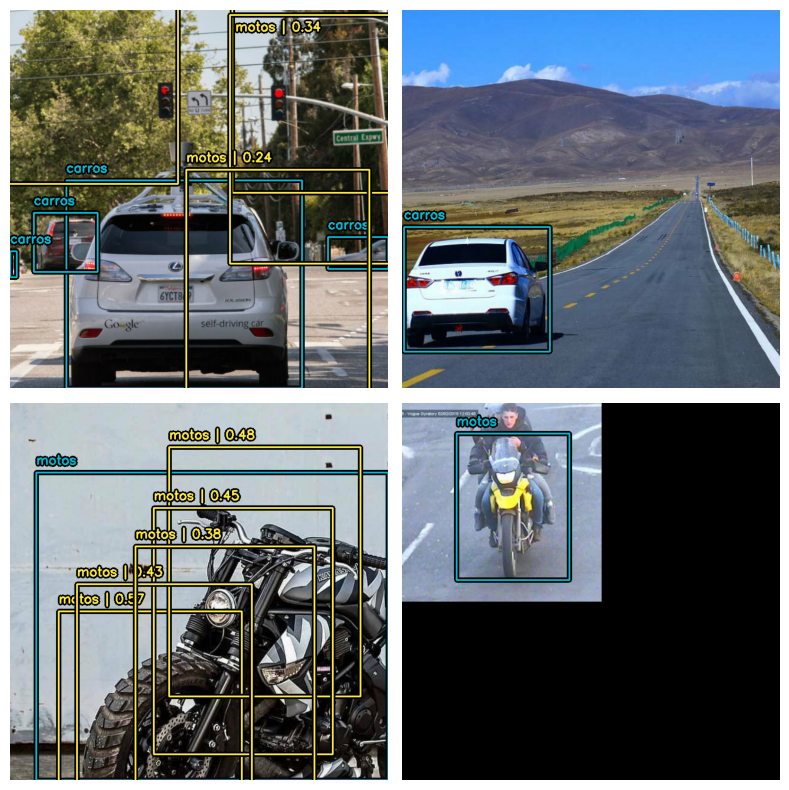

In [ ]:
visualize_detections(yolo, dataset=val_ds, bounding_box_format="xyxy")